## "Unemployment Impact: COVID-19 and India"

### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")

In [3]:
df2=pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")

In [4]:
print(df1.shape)
print(df2.shape)

(267, 9)
(768, 7)


In [5]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Understanding the data:

We have two datasets, df1 and df2:

**df1:**

- Region - States in which data was collected. There are altogether 27 states in the dataset.

- Date- Date of observation.

- Frequency- observations were collected on monthly basis.

- Estimated Unemployment Rate (%) - ratio of unemployed people and actively seeking employment by total labor force.

- Estimated Employed - count of the number of people who are employed or are actively working.

- Estimated Labour Participation Rate (%)- ratio of labor force by working-age population. Labour force is the number of people who are employed and the unemployed people who are actively seeking for job. Working-age population indicates the age band a person should lie in to be eligible for work.

- Region.1 - location

**df2:**

- Area - rural or urban.



### Summary statistics and basic info:

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Note: Column names contain whitespaces. We will remove those unnecessary whitespaces:

In [10]:
df1.rename(columns= lambda x: x.strip(), inplace=True)
df2.rename(columns=lambda x: x.strip(), inplace=True)

In [11]:
#converting Date column to datetime object:
df1.Date = pd.to_datetime(df1["Date"]).dt.strftime('%d-%m-%Y')
df2.Date = pd.to_datetime(df2["Date"]).dt.strftime('%d-%m-%Y')

In [12]:
print(df1.info())
print("*"*100)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None
**********************************************************

In [13]:
print("Summary stats of df1:")
df1.describe()



Summary stats of df1:


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [14]:
print("Summary stats of df2:")
df2.describe()

Summary stats of df2:


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### Exploratory Data Analysis(EDA):

In this subsection, we will perform preprocessing steps and conclude conclusions by plotting visuals:

In [15]:
df1.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [16]:
df2.isna().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [17]:
df2.dropna(axis=0, inplace=True)

In [18]:
df2.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [19]:
print(df1.shape)
print(df2.shape)

(267, 9)
(740, 7)


In [20]:
print(len(df1["Region"].unique()))
print(len(df2["Region"].unique()))

27
28


We see that not all states were targated. Only potential states and union territories were targated.

Summarizing various tendencies to understand Estimated Unemployment Rate (%), Estimated Employed and Estimated Labour Participation Rate (%) based on States and Union Territories:

In [21]:
df1.groupby(by=["Region"], as_index=False)["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"].mean().sort_values(by='Estimated Unemployment Rate (%)', ascending=False).reset_index(drop=True)

/tmp/ipykernel_32/2177293838.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(by=["Region"], as_index=False)["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"].mean().sort_values(by='Estimated Unemployment Rate (%)', ascending=False).reset_index(drop=True)


,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Haryana,27.477000,6.844059e+06,42.100000
1,Tripura,25.055000,1.397292e+06,57.848000
2,Jharkhand,19.539000,8.770642e+06,40.356000
3,Bihar,19.471000,2.360683e+07,37.173000
4,Delhi,18.414000,4.632822e+06,35.857000
5,Puducherry,17.942000,3.652629e+05,35.918000
6,Jammu & Kashmir,16.477778,3.310032e+06,37.894444
7,Himachal Pradesh,16.065000,2.033885e+06,40.252000
8,Rajasthan,15.868000,1.973175e+07,40.591000
9,Tamil Nadu,12.187000,2.198790e+07,37.383000


In [22]:
df2.groupby(by=['Region'], as_index=False)[["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]].mean().sort_values(by=['Estimated Unemployment Rate (%)'], ascending=False).reset_index(drop=True)

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Tripura,28.350357,7.170026e+05,61.823929
1,Haryana,26.283214,3.557072e+06,42.737143
2,Jharkhand,20.585000,4.469240e+06,41.670714
3,Bihar,18.918214,1.236619e+07,38.153929
4,Himachal Pradesh,18.540357,1.059824e+06,44.222143
5,Delhi,16.495357,2.627513e+06,38.929643
6,Jammu & Kashmir,16.188571,1.799932e+06,41.030952
7,Chandigarh,15.991667,3.168312e+05,39.336667
8,Rajasthan,14.058214,1.004106e+07,39.973214
9,Uttar Pradesh,12.551429,2.809483e+07,39.432500


Visualizing unemplyment rate:


#### 1. Heatmap:

In [23]:
pivot_table = df1.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='Date', aggfunc='mean')
pivot_table

Date,29-02-2020,30-04-2020,30-06-2020,30-09-2020,31-01-2020,31-03-2020,31-05-2020,31-07-2020,31-08-2020,31-10-2020
Region,,,,,,,,,,
Andhra Pradesh,5.83,20.51,3.31,6.40,5.48,5.79,17.43,8.34,6.96,6.59
Assam,4.41,11.06,0.60,1.19,4.66,4.77,9.55,3.77,5.53,3.02
Bihar,10.29,46.64,17.82,11.91,10.61,15.43,45.96,12.79,13.44,9.82
Chhattisgarh,8.38,3.41,14.23,1.96,9.65,7.54,10.50,10.27,5.63,6.62
Delhi,14.84,16.68,18.19,12.53,22.23,17.04,42.27,20.30,13.79,6.27
Goa,2.81,13.31,9.96,15.38,8.89,5.25,21.25,17.07,16.21,11.54
Gujarat,6.38,18.71,3.20,3.42,5.54,6.66,12.11,1.84,1.87,4.03
Haryana,25.77,43.22,26.70,19.68,20.34,25.05,29.02,24.18,33.50,27.31
Himachal Pradesh,16.84,2.20,13.47,12.04,16.83,18.76,26.95,24.31,15.79,13.46


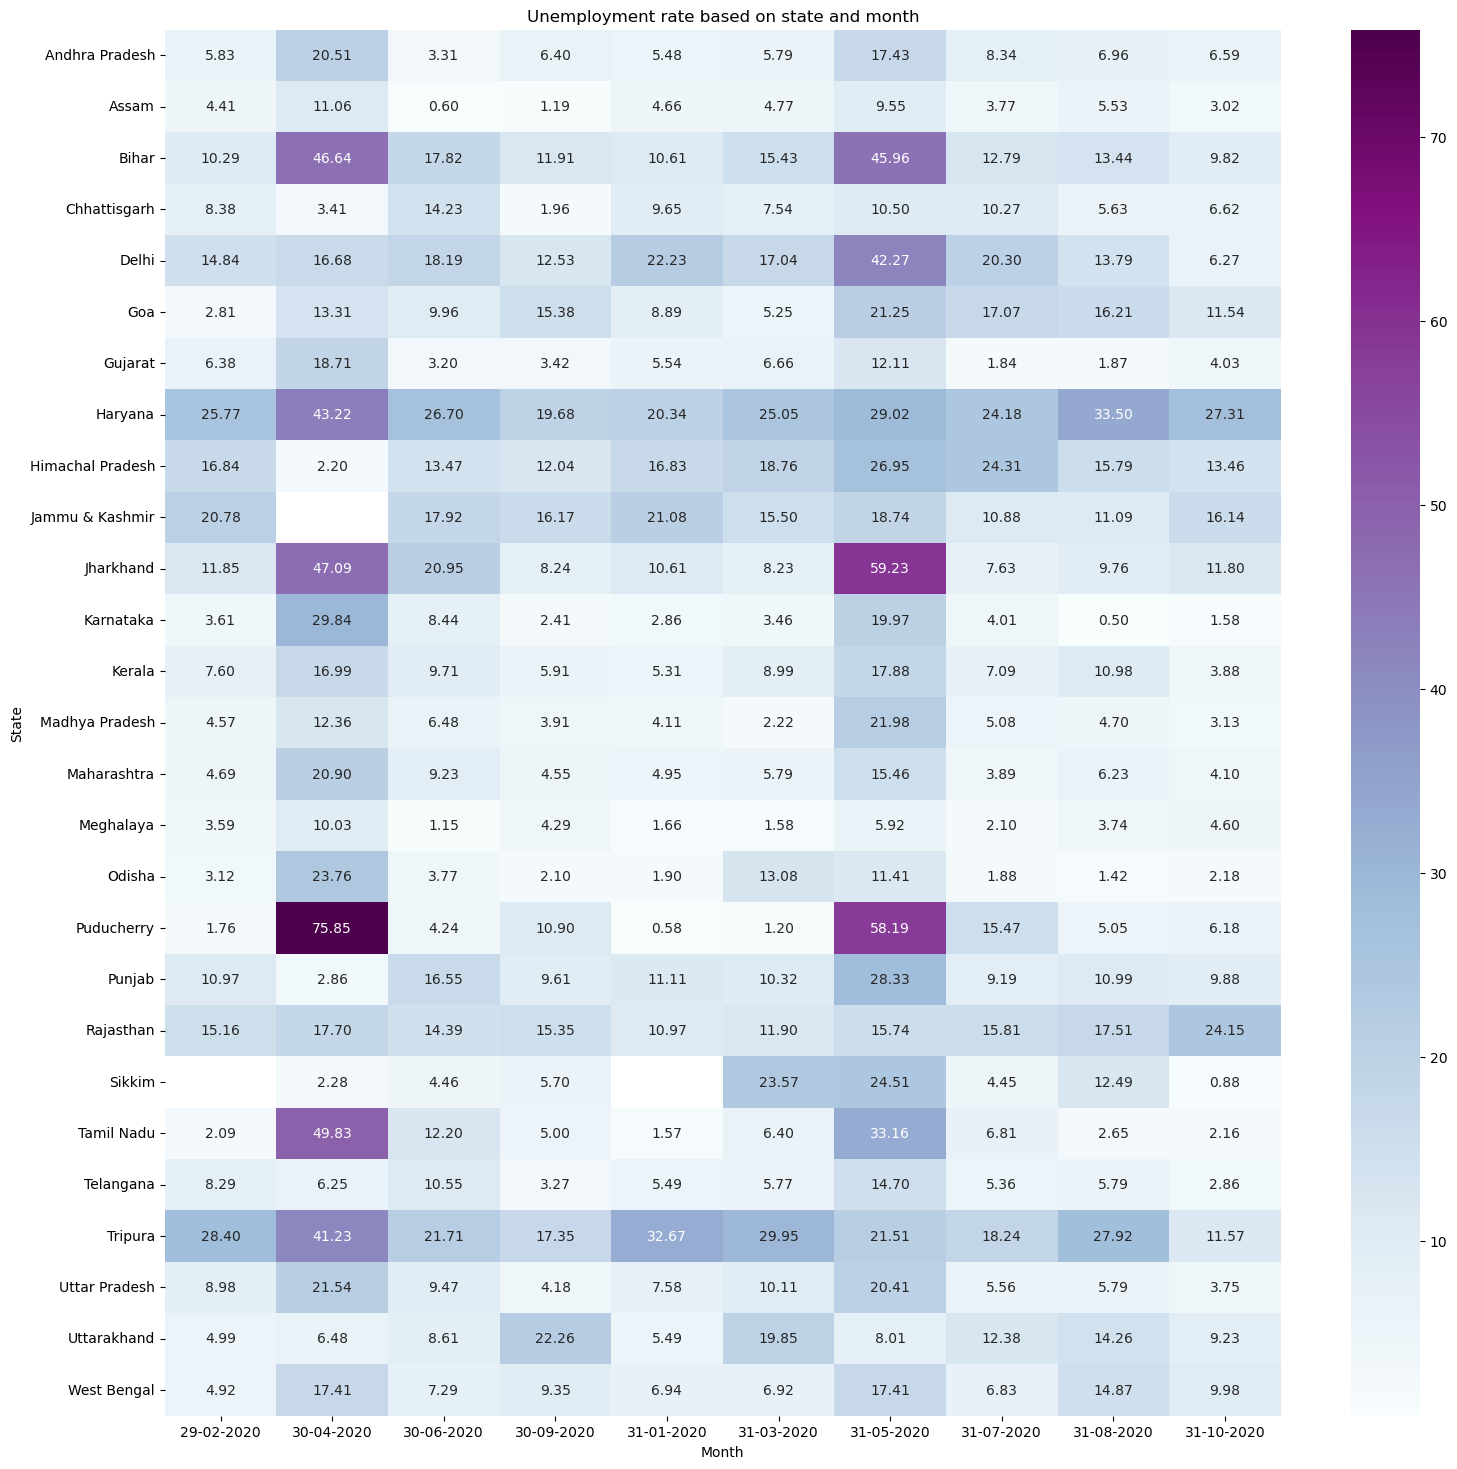

In [24]:
plt.figure(figsize=(18,18))
sns.heatmap(pivot_table, annot=True, cmap='BuPu', fmt='.2f')
plt.xlabel('Month')
plt.ylabel('State')
plt.title('Unemployment rate based on state and month')
plt.show()

In [25]:
import plotly.figure_factory as ff

plt.figure(figsize=(15,15))
plotly_fig = ff.create_annotated_heatmap(z=pivot_table.values.tolist(), x=list(pivot_table.columns), y=list(pivot_table.index))

colorscale = 'Blackbody'

plotly_fig.update_layout(width=1500, height=1500)

plotly_fig.show()

<Figure size 1500x1500 with 0 Axes>

As we can see, the heatmap vividly illustrates a drastic shift in the observations around 4th month of the year 2020, attributed to the implementation of a nationwide lockdown by PM Narendra Modi.

nan values indicate that observations were not recorded for that month.

#### 2. Grouped lineplot:

This is probably the best way to visualize the unemployment rate in different states over time. Let's implement a grouped lineplot and visualize it:

In [26]:
import plotly.express as px

In [27]:
fig = px.line(data_frame=df1, x='Date', y="Estimated Unemployment Rate (%)", color='Region', title='Unemployment rate in India by states over time', labels={'Date':'Month', 'Estimated Unemployment Rate (%)':"Unemployment Rate(%)"})
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Unemployment Rate (%)",
    legend_title="State"
)
fig.show()

#### 3. Animated Chloropleth map:

In [28]:
fig = px.scatter_geo(df1,'longitude','latitude', color="Region", hover_name="Region", size="Estimated Unemployment Rate (%)",animation_frame="Date",scope='asia',template='plotly',title='Unemployment in India by states:')
fig.update_geos(showocean=True, showland=True, showcoastlines=True)
fig.update_layout(title_x=0.5)
fig.show()

### We now visualize the unemployment rate based on north, south, east and west:

#### 4. Horizontal bar graph:

In [29]:
df1.groupby(by=['Region.1'])[["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"]].mean().sort_values(by='Estimated Unemployment Rate (%)', ascending=False).reset_index(drop=False)

,Region.1,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,North,15.889620,1.307249e+07,38.702658
1,East,13.916000,1.960237e+07,40.108750
2,Northeast,10.950263,3.617106e+06,52.055263
3,South,10.454667,1.404059e+07,40.436167
4,West,8.239000,1.862351e+07,41.257000


In [30]:
fig = px.bar(data_frame=df1, x='Estimated Unemployment Rate (%)', y='Region.1', color='Region', template='ggplot2', animation_frame='Date', range_x=[0, df1["Estimated Unemployment Rate (%)"].max()])
fig.show()

Note: In the above horizontal bar graph, i have normalized the plot to understand the contribution of each state in respective division

In [31]:
df2.groupby(by=['Area'] )[["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"]].mean().sort_values(by=['Estimated Unemployment Rate (%)'], ascending=False).reset_index(drop=False)

,Area,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Urban,13.166614,4.388626e+06,40.901365
1,Rural,10.324791,1.019285e+07,44.464819


From the stats we see that, unemployment rate is higher in urban areas but the labour paticipation rate is higher in case of rural areas. The reason could be, during the lockdown, large number of people moved from Urban to rural areas in India. Thereby increasing the labour force in the rural areas.